# **TESLA (TSLA) STOCK PRICE PREDICTION USING FACEBOOK PROPHET**

In order to predict the price of Tesla 30 days in advance, this script tends to produce a Facebook Prophet Machine learning model. Additionally, the performance of Tesla in the past is examined to determine how effectively the model worked. The following tasks are carried out in order to achieve the objective.

1. *Importing all required libraries*
2. *Importing the Yahoo Finance dataset*
3. *Utilizing Plotly express for data visualisation*
4. *Preparing Data for Modeling*
5. *Creating Facebook Prophet Model*
6. *Forecasting Stocks data for next 30 days*
7. *Downlaoding the predicted data*

## 1. Importing all required libraries

In [2]:
!pip install prophet

In [3]:
# Importing libraries
import pandas as pd  #data analysis
import plotly.express as px # visualization
from prophet import Prophet #Forecasting

In [4]:
# pip install yfinance pandas

import yfinance as yf
import pandas as pd

# 1. Download last 1 year of daily raw (un-adjusted) data for TSLA
df = yf.download(
    tickers="TSLA",
    period="1y",         # last 365 days
    interval="1d",       # daily bars
    auto_adjust=False,   # keep raw Close + separate Adj Close
    progress=False
)

# 2. Turn the Date index into a proper column
df.reset_index(inplace=True)

# 3. If your columns came in as a MultiIndex (e.g. level 0 = "TSLA", level 1 = field),
#    drop the top level so you only have the field names:
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.droplevel(1)

# 4. Now reorder/filter to exactly the columns you want
desired = ["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]
df = df[[col for col in desired if col in df.columns]]

# 5. Save to CSV — pandas will write one header row only
output_path = "TSLA.csv"
df.to_csv(output_path, index=False)

print(f"Saved {len(df)} rows with columns {list(df.columns)} to {output_path}")


Saved 250 rows with columns ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'] to TSLA.csv


In [5]:
#Initializing plotly
import plotly.io as pio
pio.renderers.default='colab'

## 2. Data gathering using Yahoo Finance

In order to download realtime stock dataset for TESLA. Go to yahoo finance and search for TSLA to see tesla's stock dataset or click [here](https://finance.yahoo.com/quote/TSLA/). Then click on historical data tab, then click on apply and then download the dataset file. Here, 1year 2year till 5 year data can easily be extarcted. The file will be downloaded in csv format.

In [6]:
stock_data_df= pd.read_csv('TSLA.csv')
stock_data_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-05-17,173.550003,179.630005,172.750000,177.460007,177.460007,77445800
1,2024-05-20,177.559998,177.750000,173.520004,174.949997,174.949997,61727400
2,2024-05-21,175.509995,186.880005,174.710007,186.600006,186.600006,115266500
3,2024-05-22,182.850006,183.800003,178.119995,180.110001,180.110001,88313500
4,2024-05-23,181.800003,181.899994,173.259995,173.740005,173.740005,71975500
...,...,...,...,...,...,...,...
245,2025-05-12,321.989990,322.209991,311.500000,318.380005,318.380005,112826700
246,2025-05-13,320.000000,337.589996,316.799988,334.070007,334.070007,136992600
247,2025-05-14,342.500000,350.000000,337.000000,347.679993,347.679993,136997300
248,2025-05-15,340.339996,346.140015,334.720001,342.820007,342.820007,97882600


In [7]:
# To check minimum date
stock_data_df['Date'].min()

'2024-05-17'

In [8]:
# To check maximum date
stock_data_df['Date'].max()

'2025-05-16'

In [9]:
# To view dataframe information
stock_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


In [10]:
# To view statisctical information
stock_data_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,277.880280,284.800640,270.697920,278.008840,278.008840,9.705516e+07
std,77.168711,78.897457,74.472781,76.689030,76.689030,3.793270e+07
min,171.119995,174.750000,167.410004,170.660004,170.660004,3.716760e+07
25%,221.447495,225.097504,216.372498,220.747498,220.747498,6.815430e+07
50%,253.165001,259.645004,246.195000,252.790001,252.790001,8.740075e+07
75%,341.067497,346.869995,333.912491,338.500000,338.500000,1.154802e+08
max,475.899994,488.540009,457.510010,479.859985,479.859985,2.217073e+08


## 3. Data Visualization using plotly express

The visualization is conducted to assess TESLA's past performance. In this regard, three plotting methods are used:

1. Area graph
2. Line graph
3. Bar graph

In [11]:
px.area(stock_data_df, x='Date', y='Close') # Here, 'Close' denotes the price of the stocks

In [12]:
px.line(stock_data_df, x='Date', y='Close')

In [13]:
# This is the daily transactional volumne of data
px.area(stock_data_df, x='Date', y='Volume')

In [14]:
px.bar(stock_data_df, y='Volume')

In [15]:
# To analyze statistical data ( We dont need to specify x axis everytime)
px.box(stock_data_df, y='Close')

## 4. Data Preperation

In [16]:
stock_data_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-05-17,173.550003,179.630005,172.750000,177.460007,177.460007,77445800
1,2024-05-20,177.559998,177.750000,173.520004,174.949997,174.949997,61727400
2,2024-05-21,175.509995,186.880005,174.710007,186.600006,186.600006,115266500
3,2024-05-22,182.850006,183.800003,178.119995,180.110001,180.110001,88313500
4,2024-05-23,181.800003,181.899994,173.259995,173.740005,173.740005,71975500
...,...,...,...,...,...,...,...
245,2025-05-12,321.989990,322.209991,311.500000,318.380005,318.380005,112826700
246,2025-05-13,320.000000,337.589996,316.799988,334.070007,334.070007,136992600
247,2025-05-14,342.500000,350.000000,337.000000,347.679993,347.679993,136997300
248,2025-05-15,340.339996,346.140015,334.720001,342.820007,342.820007,97882600


In [17]:
# Creating new df with date and price column (Close is the Price and it is y , whereas, x is date)
columns= ['Date', 'Close']
new_stock_data_df= pd.DataFrame(stock_data_df, columns=columns)
new_stock_data_df

,Date,Close
0,2024-05-17,177.460007
1,2024-05-20,174.949997
2,2024-05-21,186.600006
3,2024-05-22,180.110001
4,2024-05-23,173.740005
...,...,...
245,2025-05-12,318.380005
246,2025-05-13,334.070007
247,2025-05-14,347.679993
248,2025-05-15,342.820007


In [18]:
# Renaming dataframe columns as per the requirement of Facebook Prophet model
prophet_df = new_stock_data_df.rename(columns={'Date': 'ds', 'Close':'y'})
prophet_df

,ds,y
0,2024-05-17,177.460007
1,2024-05-20,174.949997
2,2024-05-21,186.600006
3,2024-05-22,180.110001
4,2024-05-23,173.740005
...,...,...
245,2025-05-12,318.380005
246,2025-05-13,334.070007
247,2025-05-14,347.679993
248,2025-05-15,342.820007


## 5. Creating Facebook Prophet Model

In [19]:
# Initializing and fitting prophet model
model = Prophet()
model.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc1xsgn1b/oklm8l2d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc1xsgn1b/hrgkmfk5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39202', 'data', 'file=/tmp/tmpc1xsgn1b/oklm8l2d.json', 'init=/tmp/tmpc1xsgn1b/hrgkmfk5.json', 'output', 'file=/tmp/tmpc1xsgn1b/prophet_modelobn2vub0/prophet_model-20250517095243.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:52:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:52:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## 6. Model Prediction/Forecasting

In [20]:
# Here, model will do forecasting for 1 month as dao=ily data is passed therefore, period=30 means, 30 days
future_data_prediction= model.make_future_dataframe(periods= 30)
forecast=model.predict(future_data_prediction)

In [21]:
forecast
# Here, yhat is the predicted value
# yhat_lower is the lower limit and yhat_upper is the upper limit


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-05-17,172.644985,126.960891,222.460717,172.644985,172.644985,1.933381,1.933381,1.933381,1.933381,1.933381,1.933381,0.0,0.0,0.0,174.578366
1,2024-05-20,174.364544,123.903448,218.679728,174.364544,174.364544,-2.302615,-2.302615,-2.302615,-2.302615,-2.302615,-2.302615,0.0,0.0,0.0,172.061928
2,2024-05-21,174.937730,127.900014,223.382119,174.937730,174.937730,-0.822962,-0.822962,-0.822962,-0.822962,-0.822962,-0.822962,0.0,0.0,0.0,174.114768
3,2024-05-22,175.510916,123.516451,220.817342,175.510916,175.510916,-1.343922,-1.343922,-1.343922,-1.343922,-1.343922,-1.343922,0.0,0.0,0.0,174.166994
4,2024-05-23,176.084102,127.025953,224.876820,176.084102,176.084102,-1.819402,-1.819402,-1.819402,-1.819402,-1.819402,-1.819402,0.0,0.0,0.0,174.264700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2025-06-11,214.518143,167.943416,262.797529,210.400168,219.456354,-1.343922,-1.343922,-1.343922,-1.343922,-1.343922,-1.343922,0.0,0.0,0.0,213.174222
276,2025-06-12,213.410165,163.493700,261.050549,208.985064,218.636350,-1.819402,-1.819402,-1.819402,-1.819402,-1.819402,-1.819402,0.0,0.0,0.0,211.590763
277,2025-06-13,212.302188,165.059713,262.474965,207.624530,217.960949,1.933381,1.933381,1.933381,1.933381,1.933381,1.933381,0.0,0.0,0.0,214.235568
278,2025-06-14,211.194210,163.361046,259.304322,206.125558,217.113123,2.177760,2.177760,2.177760,2.177760,2.177760,2.177760,0.0,0.0,0.0,213.371970


In [22]:
px.line(forecast, x='ds', y='yhat')

#This means that the stock price will go down in next 30 days

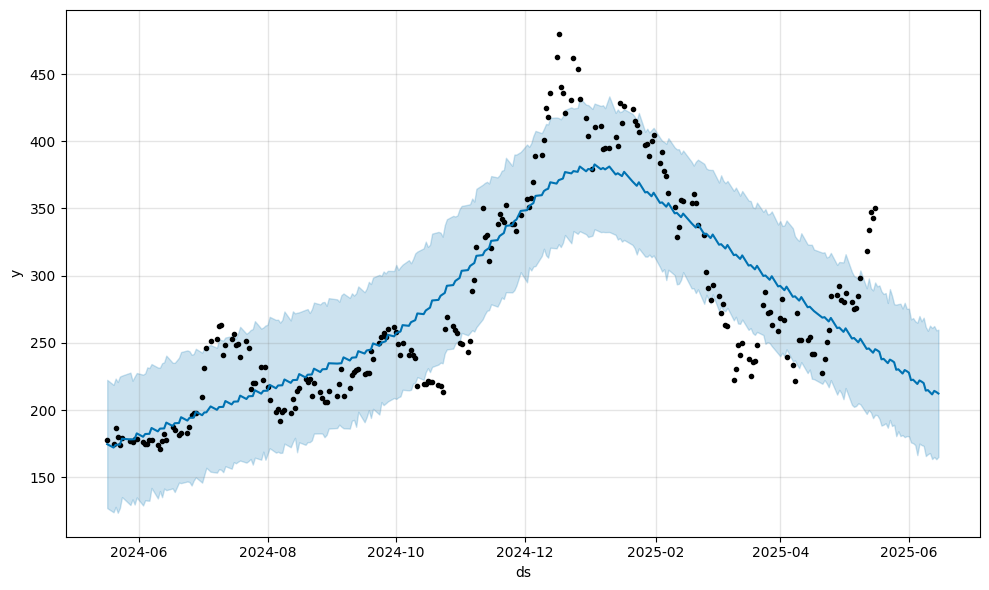

In [23]:
figure=model.plot(forecast,xlabel='ds', ylabel='y')
# Here black dots is tthe actual price of tesla and blue is the forecasted price

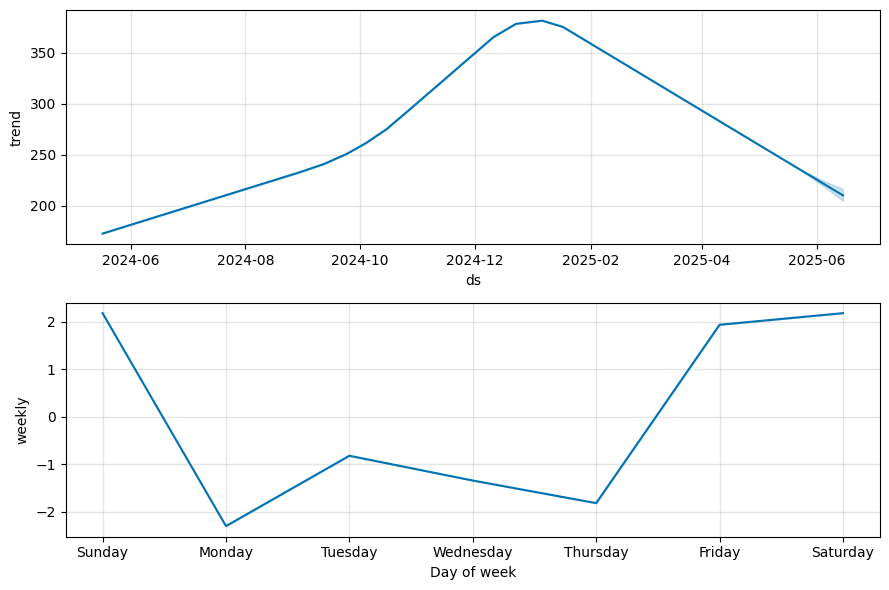

In [24]:
# Plotting weekly trend and overall trend
figure2=model.plot_components(forecast)


## 7. Downloading the Forecast data

In [25]:
# To download the forecasted file directly
from google.colab import files
forecast.to_csv("TESLA_stock_forecast.csv")
files.download('TESLA_stock_forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>